In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
url = "https://raw.githubusercontent.com/pirple/Data-Mining-With-Python/master/Part%202/single_family_home_values.csv"
df = pd.read_csv(url, sep = ',')
df.head()

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.849160,-104.893468,3,2.0,6,1378,9968,2003.0,2009-12-17,75000,2004-05-13,165700.0,239753
1,184578398,10556 Wheeling St,Denver,CO,80022,39.888020,-104.830930,2,2.0,6,1653,6970,2004.0,2004-09-23,216935,NaN,NaN,343963
2,184430015,3190 Wadsworth Blvd,Denver,CO,80033,39.761710,-105.081070,3,1.0,0,1882,23875,1917.0,2008-04-03,330000,NaN,NaN,488840
3,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.760780,-105.081060,4,3.0,0,2400,11500,1956.0,2008-12-02,185000,2008-06-27,0.0,494073
4,245107,5615 S Eaton St,Denver,CO,80123,39.616181,-105.058812,3,4.0,8,2305,5600,1998.0,2012-07-18,308000,2011-12-29,0.0,513676


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   address          15000 non-null  object 
 2   city             15000 non-null  object 
 3   state            15000 non-null  object 
 4   zipcode          15000 non-null  int64  
 5   latitude         14985 non-null  float64
 6   longitude        14985 non-null  float64
 7   bedrooms         15000 non-null  int64  
 8   bathrooms        15000 non-null  float64
 9   rooms            15000 non-null  int64  
 10  squareFootage    15000 non-null  int64  
 11  lotSize          15000 non-null  int64  
 12  yearBuilt        14999 non-null  float64
 13  lastSaleDate     15000 non-null  object 
 14  lastSaleAmount   15000 non-null  int64  
 15  priorSaleDate    11173 non-null  object 
 16  priorSaleAmount  11287 non-null  float64
 17  estimated_va

In [6]:
#convert the dates of prior and last sales to date format
df['lastSaleDate'] = pd.to_datetime(df.lastSaleDate)
df['priorSaleDate'] = pd.to_datetime(df.priorSaleDate)

In [7]:
df['diff_days'] = df["lastSaleDate"] - df['priorSaleDate']
df['diff_days'] = df['diff_days'].dt.days
df

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value,diff_days
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.849160,-104.893468,3,2.0,6,1378,9968,2003.0,2009-12-17,75000,2004-05-13,165700.0,239753,2044.0
1,184578398,10556 Wheeling St,Denver,CO,80022,39.888020,-104.830930,2,2.0,6,1653,6970,2004.0,2004-09-23,216935,NaT,NaN,343963,NaN
2,184430015,3190 Wadsworth Blvd,Denver,CO,80033,39.761710,-105.081070,3,1.0,0,1882,23875,1917.0,2008-04-03,330000,NaT,NaN,488840,NaN
3,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.760780,-105.081060,4,3.0,0,2400,11500,1956.0,2008-12-02,185000,2008-06-27,0.0,494073,158.0
4,245107,5615 S Eaton St,Denver,CO,80123,39.616181,-105.058812,3,4.0,8,2305,5600,1998.0,2012-07-18,308000,2011-12-29,0.0,513676,202.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,51411356,802 S High St,Denver,CO,80209,39.701902,-104.964871,4,4.0,8,2169,4950,1922.0,2000-08-24,333000,NaT,NaN,1080081,NaN
14996,21721153,214 S Lincoln St,Denver,CO,80209,39.712608,-104.986000,3,3.0,11,2937,4500,1890.0,2015-03-05,645000,2012-07-23,557500.0,807306,955.0
14997,12995320,870 S Race St,Denver,CO,80209,39.700736,-104.963707,3,5.0,7,2937,4680,2007.0,2012-01-17,1115000,2008-07-15,1208214.0,1737156,1281.0
14998,39611615,130 S Lafayette St,Denver,CO,80209,39.714088,-104.970701,3,4.0,10,3193,4970,2005.0,2011-08-10,1350000,2004-12-07,405000.0,2008794,2437.0


In [8]:
df['diff_days'].describe()

count    11173.000000
mean      1910.182941
std       2303.579643
min      -1398.000000
25%        281.000000
50%       1205.000000
75%       2597.000000
max      18207.000000
Name: diff_days, dtype: float64

In [9]:
df.isnull().sum()

id                    0
address               0
city                  0
state                 0
zipcode               0
latitude             15
longitude            15
bedrooms              0
bathrooms             0
rooms                 0
squareFootage         0
lotSize               0
yearBuilt             1
lastSaleDate          0
lastSaleAmount        0
priorSaleDate      3827
priorSaleAmount    3713
estimated_value       0
diff_days          3827
dtype: int64

In [10]:
#why 'diff_days' has value < 0 where lastSaleDate  is not null

df[df['diff_days']<0]

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value,diff_days
520,51138584,14 N Pearl St,Denver,CO,80203,39.716824,-104.979979,1,2.0,5,2267,3994,1895.0,2000-07-13,267500,2004-05-11,47500.0,560032,-1398.0


In [11]:
#The data might be put in wrong place, so we resort lastSaleDate and priorSaleDate 
df[["priorSaleDate", "lastSaleDate"]]=df.apply(lambda x: pd.Series(sorted([x.priorSaleDate, x.lastSaleDate])), axis=1)

In [12]:
df['diff_days'] = df["lastSaleDate"] - df['priorSaleDate']
df['diff_days'] = df['diff_days'].dt.days
df['diff_days'].describe()

count    11173.000000
mean      1910.433187
std       2303.372091
min          0.000000
25%        281.000000
50%       1205.000000
75%       2597.000000
max      18207.000000
Name: diff_days, dtype: float64

In [13]:
##check values
df['address'].value_counts()

3118 N Vine St               2
3650 N Adams St              2
2531 Birch St                1
3095 Fairfax St              1
3075 Fairfax St              1
                            ..
3150 N Fillmore St           1
2009 N Race St               1
2511 N Race St               1
2534 N Franklin St           1
100 S University Blvd # 1    1
Name: address, Length: 14998, dtype: int64

In [14]:
df[df['address'] == '3650 N Adams St']
#two houses share the same address but differ from lotSize and yearBuilt --OK--

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value,diff_days
3274,320948074,3650 N Adams St,Denver,CO,80205,NaN,NaN,4,4.0,7,2826,4690,2016.0,2017-05-23,735000,NaT,NaN,745537,NaN
6145,4277764,3650 N Adams St,Denver,CO,80205,NaN,NaN,1,1.0,3,472,9370,1926.0,2015-07-20,250000,NaT,NaN,745483,NaN


In [15]:
df[df['address'] == '3118 N Vine St']
##this are duplicated values

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value,diff_days
4762,248507008,3118 N Vine St,Denver,CO,80205,NaN,NaN,4,4.0,8,1908,4685,2012.0,2013-02-21,425000,NaT,NaN,670436,NaN
4764,216346608,3118 N Vine St,Denver,CO,80205,39.761214,-104.961873,4,4.0,8,1908,4685,2012.0,2013-02-21,425000,NaT,NaN,671744,NaN


In [16]:
df.drop(df.index[4762], axis = 0, inplace = True)

In [17]:
#change the zipcode to strings
df['zipcode'] = df['zipcode'].astype(str)

In [18]:
#I also drop some features that I dont use to analyze 
df.drop(['state','address','city'],axis=1, inplace=True)
df

,id,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value,diff_days
0,39525749,80022,39.849160,-104.893468,3,2.0,6,1378,9968,2003.0,2009-12-17,75000,2004-05-13,165700.0,239753,2044.0
1,184578398,80022,39.888020,-104.830930,2,2.0,6,1653,6970,2004.0,2004-09-23,216935,NaT,NaN,343963,NaN
2,184430015,80033,39.761710,-105.081070,3,1.0,0,1882,23875,1917.0,2008-04-03,330000,NaT,NaN,488840,NaN
3,155129946,80033,39.760780,-105.081060,4,3.0,0,2400,11500,1956.0,2008-12-02,185000,2008-06-27,0.0,494073,158.0
4,245107,80123,39.616181,-105.058812,3,4.0,8,2305,5600,1998.0,2012-07-18,308000,2011-12-29,0.0,513676,202.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,51411356,80209,39.701902,-104.964871,4,4.0,8,2169,4950,1922.0,2000-08-24,333000,NaT,NaN,1080081,NaN
14996,21721153,80209,39.712608,-104.986000,3,3.0,11,2937,4500,1890.0,2015-03-05,645000,2012-07-23,557500.0,807306,955.0
14997,12995320,80209,39.700736,-104.963707,3,5.0,7,2937,4680,2007.0,2012-01-17,1115000,2008-07-15,1208214.0,1737156,1281.0
14998,39611615,80209,39.714088,-104.970701,3,4.0,10,3193,4970,2005.0,2011-08-10,1350000,2004-12-07,405000.0,2008794,2437.0


# Q1. WHY THE ESTIMATED VALUES ARE SPREAD IN ZIPCODE 80206 AND 80209


<AxesSubplot:xlabel='zipcode', ylabel='estimated_value'>

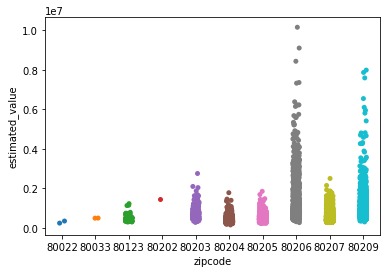

In [19]:
sns.stripplot(x=df.zipcode, y=df.estimated_value)

In [20]:
#check mối tương quan của estimated value 
df.corr().loc['estimated_value', :].sort_values(ascending=False)

estimated_value    1.000000
squareFootage      0.824510
bathrooms          0.715977
priorSaleAmount    0.590177
rooms              0.581036
lotSize            0.456543
lastSaleAmount     0.418460
bedrooms           0.369144
yearBuilt          0.174462
id                 0.126222
longitude          0.121984
diff_days          0.049273
latitude          -0.266116
Name: estimated_value, dtype: float64

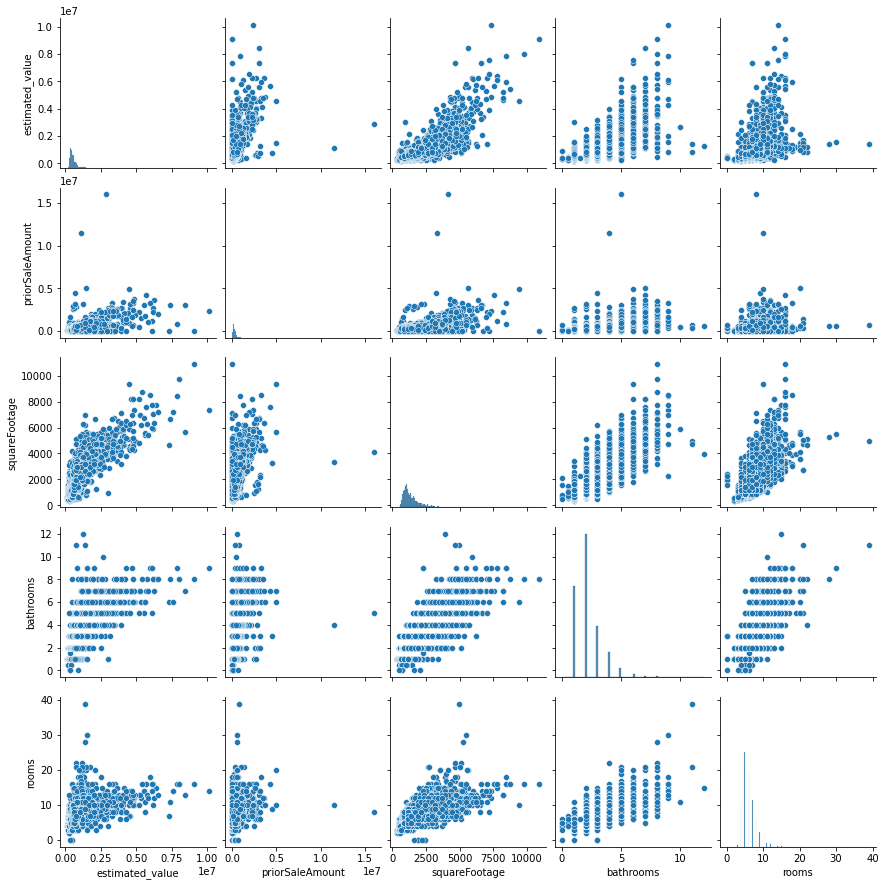

In [21]:
sns.pairplot(df[['estimated_value','priorSaleAmount','squareFootage','bathrooms','rooms']], diag_kind="hist")

<p>Ta có thể thấy mối tương quan giữa 'estimated_value' vs 'squareFootage' + 'bathrooms' + priorSaleAmount + rooms rất lớn, đồng nghĩa là estimated_value dường như chịu ảnh hưởng bởi diện tích nhà khá lớn, tiếp theo là số lượng phòng ngủ, số lượng phòng cũng như giá nhà đầu tiên được rao bán.

## Tìm hiểu mối quan hệ giữa Estimated Value và các biến

## A. Estimated Value vs SquareFootage

In [23]:
sqf_pivot = df.pivot_table(index='squareFootage', values='estimated_value', aggfunc=np.median)
sqf_pivot.reset_index()

,squareFootage,estimated_value
0,350,241357.0
1,360,414825.0
2,375,251202.0
3,392,263706.0
4,434,280173.0
...,...,...
2899,8477,5943146.0
2900,8715,5407649.0
2901,9394,4520364.0
2902,9780,7976662.0


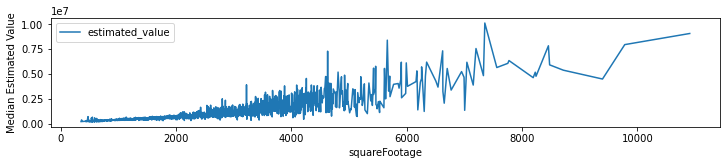

In [24]:
sqf_pivot.plot(figsize=(12,2))
plt.xlabel('squareFootage')
plt.ylabel('Median Estimated Value')
plt.xticks(rotation=0)
plt.show()

<AxesSubplot:xlabel='zipcode', ylabel='squareFootage'>

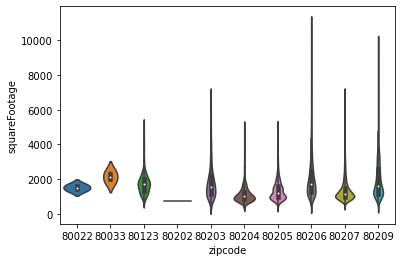

In [25]:
sns.violinplot(x=df.zipcode, y=df.squareFootage)

In [26]:
print('Show the top 20 houses having largest SQF')
df.sort_values('squareFootage', ascending=False).head(20)

Show the top 20 houses having largest SQF


,id,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value,diff_days
8173,51266875,80206,39.730670,-104.962130,9,8.0,16,10907,42381,1918.0,2010-07-01,4500000,2004-05-04,0.0,9093801,2249.0
13951,51438767,80209,39.700009,-104.948047,5,8.0,16,9780,43300,2003.0,2000-08-08,1471500,NaT,NaN,7976662,NaN
8394,30596501,80206,39.722770,-104.942890,4,6.0,10,9394,12500,2014.0,2012-04-27,1000000,2007-09-12,4900000.0,4520364,1689.0
13330,30607453,80209,39.704609,-104.951745,4,8.0,16,8715,57466,1961.0,2006-02-06,4290000,NaT,NaN,5407649,NaN
13607,43141093,80209,39.704295,-104.955257,6,9.0,18,8477,88862,1956.0,2003-06-05,2700000,2001-11-14,3300000.0,5943146,568.0
13293,4277908,80209,39.699654,-104.947751,6,9.0,16,8456,20300,2004.0,2005-09-01,4650000,2002-04-15,850000.0,7860355,1235.0
13913,184306038,80209,39.704232,-104.956407,3,6.0,13,8241,55300,2013.0,2013-08-29,3100000,NaT,NaN,4799277,NaN
7069,24571184,80206,39.719695,-104.961633,4,7.0,13,8228,16300,1928.0,2008-07-23,5500000,2002-07-30,2200000.0,5204393,2185.0
13177,184309735,80209,39.705876,-104.954004,4,7.0,13,8192,46400,2003.0,2011-09-22,3815000,NaT,NaN,4657291,NaN
7592,204940560,80206,39.718700,-104.963750,5,8.0,15,7772,33470,1919.0,2001-01-26,3075000,NaT,NaN,6374718,NaN


In [27]:
print('The statistics of Sqf per Zipcode')
df.groupby('zipcode')['squareFootage'].describe()

The statistics of Sqf per Zipcode


,count,mean,std,min,25%,50%,75%,max
zipcode,,,,,,,,
80022,2.0,1515.500000,194.454365,1378.0,1446.75,1515.5,1584.25,1653.0
80033,2.0,2141.000000,366.281313,1882.0,2011.50,2141.0,2270.50,2400.0
80123,184.0,1765.250000,620.857113,808.0,1343.00,1710.0,2013.75,5009.0
80202,1.0,753.000000,NaN,753.0,753.00,753.0,753.00,753.0
80203,385.0,1805.857143,944.713933,572.0,1123.00,1574.0,2176.00,6649.0
80204,2555.0,1117.158513,449.121316,350.0,835.00,1008.0,1281.50,5139.0
80205,3579.0,1345.961721,551.560414,360.0,945.00,1205.0,1610.00,5130.0
80206,2384.0,2062.532718,1127.215774,530.0,1270.75,1728.5,2488.00,10907.0
80207,4047.0,1343.173956,592.049076,484.0,971.50,1158.0,1502.00,7004.0


<b>Dựa trên biểu đồ tương quan giữa estimated value và Square Footage ta có thể thấy xu hướng chung Estimated Value tăng khi Square Footage tăng

<p> Zipcode 80022, 80033, 80202 có số lượng nhà khá nhỏ, ta có thể bỏ qua và so sánh các zipcode còn lại thì 80206 và 80209 có mức trung bình cũng như median nhỉnh hơn so với các khu vực khác. đây cũng là khu vực có nhiều nhà có diện tích lớn nhất trong toàn bang với diện tích nhà đa dạng.<p> Với ZipCode: 80206 diện tích nhà từ 530sqf tới 10907sqf tập trung chủ yếu ở mức 1270 - 2500 sqr và ở zipcode 80209 diện tích nhà từ mức 559 sqf tới 9780 sqf và tập trung chủ yếu quanh mốc 1135 - 1605sqr. Đó cũng giải thích lý do vì sao estimated value tại khu vực này spread tương đối rộng.

## B. Estimated Value vs Bathrooms & Rooms

In [28]:
df[['squareFootage','bathrooms','rooms',]].corr()

,squareFootage,bathrooms,rooms
squareFootage,1.000000,0.804200,0.771192
bathrooms,0.804200,1.000000,0.686274
rooms,0.771192,0.686274,1.000000


<p>Có mối liên quan tương đối chặt chẽ giữa SquareFootage với số lượng Bathrooms và Rooms

In [29]:
sqf_br = df.pivot_table(index='bathrooms', values='estimated_value',columns='zipcode', aggfunc=np.mean)
sqf_br.reset_index()

zipcode,bathrooms,80022,80033,80123,80202,80203,80204,80205,80206,80207,80209
0,0.0,NaN,NaN,NaN,NaN,NaN,3.392575e+05,4.806598e+05,3.553570e+05,NaN,NaN
1,0.5,NaN,NaN,NaN,NaN,NaN,3.183100e+05,3.861540e+05,NaN,NaN,NaN
2,1.0,NaN,488840.0,3.316054e+05,1461697.0,4.741556e+05,3.265329e+05,3.994180e+05,5.686687e+05,3.899988e+05,5.819894e+05
3,1.5,NaN,NaN,NaN,NaN,NaN,NaN,3.496640e+05,NaN,NaN,NaN
4,2.0,291858.0,NaN,3.689047e+05,NaN,5.613660e+05,4.184134e+05,5.010207e+05,6.685247e+05,4.977234e+05,6.872249e+05
5,3.0,NaN,494073.0,4.503551e+05,NaN,6.700214e+05,5.508958e+05,6.221967e+05,8.131113e+05,6.796797e+05,9.193015e+05
6,4.0,NaN,NaN,5.484446e+05,NaN,9.581958e+05,6.592899e+05,7.252947e+05,1.211800e+06,1.001313e+06,1.334638e+06
7,5.0,NaN,NaN,7.765316e+05,NaN,1.288931e+06,7.371332e+05,1.000929e+06,1.957261e+06,1.263057e+06,1.711112e+06
8,6.0,NaN,NaN,1.128599e+06,NaN,1.338356e+06,1.209530e+06,1.116480e+06,2.642166e+06,1.512983e+06,2.341463e+06
9,7.0,NaN,NaN,1.222940e+06,NaN,NaN,NaN,1.684160e+06,3.433841e+06,1.199296e+06,3.314012e+06


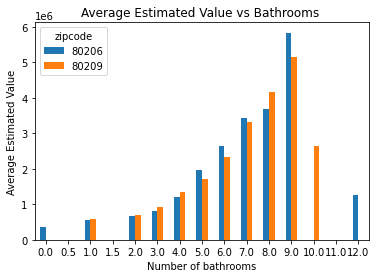

In [30]:
sqf_br[['80206','80209']].plot(kind='bar')
plt.xlabel('Number of bathrooms')
plt.ylabel('Average Estimated Value')
plt.title('Average Estimated Value vs Bathrooms ')
plt.xticks(rotation=0)
plt.show()

In [31]:
sqf_r = df.pivot_table(index='rooms',columns='zipcode', values='estimated_value', aggfunc=np.median)
sqf_r.reset_index()

zipcode,rooms,80022,80033,80123,80202,80203,80204,80205,80206,80207,80209
0,0,NaN,491456.5,439087.5,NaN,NaN,NaN,NaN,355357.0,NaN,NaN
1,2,NaN,NaN,NaN,NaN,273748.0,252531.5,297648.0,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,349473.0,275475.0,382808.5,692458.0,371119.0,542762.5
3,4,NaN,NaN,353299.0,1461697.0,466355.0,299598.0,401537.0,472441.0,380974.0,575047.0
4,5,NaN,NaN,369824.0,NaN,517787.5,350366.0,434045.5,566843.5,434498.0,612124.0
5,6,291858.0,NaN,353008.0,NaN,554976.0,366151.0,479512.5,644265.5,538201.0,698467.5
6,7,NaN,NaN,492332.0,NaN,569249.5,442349.0,565701.0,699567.5,675560.0,795709.0
7,8,NaN,NaN,513676.0,NaN,599263.0,501250.0,600652.0,778986.5,856543.5,1100370.0
8,9,NaN,NaN,592998.0,NaN,623024.5,560496.0,646081.0,912883.0,1035244.0,1222684.5
9,10,NaN,NaN,864949.5,NaN,783454.0,560574.0,718605.5,1244470.0,1001088.5,1581854.5


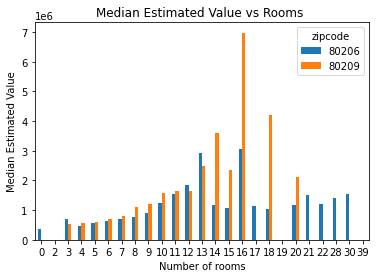

In [32]:
sqf_r[['80206','80209']].plot(kind='bar')
plt.xlabel('Number of rooms')
plt.ylabel('Median Estimated Value')
plt.title('Median Estimated Value vs Rooms ')
plt.xticks(rotation=0)
plt.show()

<p> Ta nhận thấy có mối tương quan giữa Estimated Value và số lượng bathrooms cũng như số lượng phòng, Estimated value tăng dần theo số lượng phòng tắm từ 1-9 cũng như đối với số lượng phòng từ 3-13 phòng. Tuy nhiên có quá nhiều phòng tắm hay lượng phòng chia nhỏ quá nhiều lại ảnh hưởng không tốt đối với Estimated Value. Cấu trúc phòng đa dạng tại zipcode 20806 và 20809 cũng là 1 lý do khiến estimated value spread.

# Q2. LAST SALE AMOUNT VS PRIOR SALE AMOUNT

In [33]:
df.isnull().sum()

id                    0
zipcode               0
latitude             14
longitude            14
bedrooms              0
bathrooms             0
rooms                 0
squareFootage         0
lotSize               0
yearBuilt             1
lastSaleDate          0
lastSaleAmount        0
priorSaleDate      3826
priorSaleAmount    3712
estimated_value       0
diff_days          3826
dtype: int64

In [34]:
df[df['priorSaleAmount'].isnull()]

,id,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value,diff_days
1,184578398,80022,39.888020,-104.830930,2,2.0,6,1653,6970,2004.0,2004-09-23,216935,NaT,NaN,343963,NaN
2,184430015,80033,39.761710,-105.081070,3,1.0,0,1882,23875,1917.0,2008-04-03,330000,NaT,NaN,488840,NaN
15,184328555,80123,39.629000,-105.042330,2,2.0,4,1297,16600,1962.0,2011-11-07,150000,NaT,NaN,354031,NaN
18,51335315,80123,39.615488,-105.060173,3,3.0,7,2321,6151,1998.0,1999-12-02,277900,NaT,NaN,504791,NaN
19,152799217,80123,39.616153,-105.059696,3,3.0,7,2071,6831,1999.0,2000-02-04,271800,NaT,NaN,495121,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14987,51037171,80209,39.708868,-104.969541,2,2.0,5,1145,4760,1924.0,2000-06-09,334900,NaT,NaN,700184,NaN
14988,184307468,80209,39.697471,-104.951719,2,1.0,5,1145,5520,1942.0,2011-09-26,396000,NaT,NaN,691734,NaN
14991,19402362,80209,39.703698,-104.963195,3,2.0,7,1401,6510,1931.0,2010-08-30,499900,NaT,NaN,900818,NaN
14992,184311569,80209,39.708452,-104.980694,3,2.0,8,1657,4690,1892.0,1998-04-08,81800,NaT,NaN,632156,NaN


In [35]:
print('Info data when Prior Sale Amout is null but Prior Sale Date is not null')
df[(df['priorSaleAmount'].isnull())&(df['priorSaleDate'].notnull())].info()

Info data when Prior Sale Amout is null but Prior Sale Date is not null
<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 338 to 14862
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               88 non-null     int64         
 1   zipcode          88 non-null     object        
 2   latitude         87 non-null     float64       
 3   longitude        87 non-null     float64       
 4   bedrooms         88 non-null     int64         
 5   bathrooms        88 non-null     float64       
 6   rooms            88 non-null     int64         
 7   squareFootage    88 non-null     int64         
 8   lotSize          88 non-null     int64         
 9   yearBuilt        88 non-null     float64       
 10  lastSaleDate     88 non-null     datetime64[ns]
 11  lastSaleAmount   88 non-null     int64         
 12  priorSaleDate    88 non-null     datetime64[ns]
 13  priorSaleAmount  0 n

In [36]:
df3 = df[df['diff_days'] == 0]
df3[df3['lastSaleAmount'] != df3['priorSaleAmount']]

,id,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value,diff_days
7835,184764055,80206,39.729938,-104.942606,2,1.0,4,890,4460,1923.0,1998-01-20,99600,1998-01-20,24900.0,456217,0.0


In [37]:
df[df['priorSaleAmount'] == df['priorSaleAmount'].isnull()]['diff_days'].describe()

count    1296.000000
mean      611.764660
std      1052.502907
min         1.000000
25%       100.000000
50%       175.500000
75%       463.000000
max      6693.000000
Name: diff_days, dtype: float64

In [38]:
df[df['priorSaleAmount'] != df['priorSaleAmount'].isnull()]['diff_days'].describe()

count     9877.000000
mean      2080.836590
std       2367.727898
min          0.000000
25%        414.000000
50%       1397.000000
75%       2776.000000
max      18207.000000
Name: diff_days, dtype: float64

In [39]:
df[(df['lastSaleAmount'] == df['priorSaleAmount']) & (df['lastSaleDate'] == df['priorSaleDate'])]

,id,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value,diff_days
46,19150871,80123,39.630389,-105.038707,3,2.0,5,1355,9600,1960.0,1999-12-14,153500,1999-12-14,153500.0,366187,0.0
216,49467729,80203,39.724882,-104.979095,4,2.0,8,2067,4687,1891.0,2001-08-09,280000,2001-08-09,280000.0,631581,0.0
382,51301298,80203,39.722846,-104.980242,2,2.0,6,1152,3960,1913.0,2000-11-15,249900,2000-11-15,249900.0,560662,0.0
385,19113699,80203,39.717648,-104.985884,5,5.0,8,2176,6120,1890.0,2004-08-19,330000,2004-08-19,330000.0,792470,0.0
493,51256296,80203,39.724452,-104.980238,2,2.0,5,1479,4375,1916.0,2000-03-14,223600,2000-03-14,223600.0,557935,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14696,46186826,80209,39.702122,-104.956032,3,3.0,8,1638,9200,1940.0,2002-02-25,567500,2002-02-25,567500.0,1157112,0.0
14758,147918026,80209,39.709569,-104.985556,3,2.0,5,1385,4320,1893.0,2000-07-20,330000,2000-07-20,330000.0,615565,0.0
14772,51256974,80209,39.703122,-104.967180,3,1.0,6,1130,4690,1922.0,1999-07-19,262000,1999-07-19,262000.0,750034,0.0
14807,46399747,80209,39.698969,-104.955935,3,3.0,7,2412,8200,1951.0,2002-06-24,450600,2002-06-24,450600.0,1153061,0.0


In [40]:
df['diff_values'] = df["lastSaleAmount"] - df['priorSaleAmount']
df.head(10)

,id,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value,diff_days,diff_values
0,39525749,80022,39.849160,-104.893468,3,2.0,6,1378,9968,2003.0,2009-12-17,75000,2004-05-13,165700.0,239753,2044.0,-90700.0
1,184578398,80022,39.888020,-104.830930,2,2.0,6,1653,6970,2004.0,2004-09-23,216935,NaT,NaN,343963,NaN,NaN
2,184430015,80033,39.761710,-105.081070,3,1.0,0,1882,23875,1917.0,2008-04-03,330000,NaT,NaN,488840,NaN,NaN
3,155129946,80033,39.760780,-105.081060,4,3.0,0,2400,11500,1956.0,2008-12-02,185000,2008-06-27,0.0,494073,158.0,185000.0
4,245107,80123,39.616181,-105.058812,3,4.0,8,2305,5600,1998.0,2012-07-18,308000,2011-12-29,0.0,513676,202.0,308000.0
5,3523925,80123,39.615136,-105.069018,3,5.0,7,2051,6045,1996.0,2006-09-12,363500,2005-05-16,339000.0,496062,484.0,24500.0
6,30560679,80123,39.616350,-105.070760,4,4.0,8,2051,6315,1997.0,2014-12-15,420000,2006-07-07,345000.0,514953,3083.0,75000.0
7,39623928,80123,39.615213,-105.070617,3,3.0,7,2051,8133,1997.0,2004-03-15,328700,1998-04-09,225200.0,494321,2167.0,103500.0
8,148975825,80123,39.620158,-105.063094,3,3.0,7,1796,5038,1999.0,2011-08-16,274900,2011-01-10,0.0,496079,218.0,274900.0
9,184623176,80123,39.626770,-105.081990,3,3.0,0,2054,4050,2007.0,2015-12-01,407000,2012-10-30,312000.0,424514,1127.0,95000.0


In [41]:
df.corr().loc['diff_values',:].sort_values(ascending=False)

diff_values        1.000000
lastSaleAmount     0.825082
estimated_value    0.244522
squareFootage      0.180477
bathrooms          0.158595
rooms              0.118026
id                 0.117291
lotSize            0.109532
diff_days          0.100921
bedrooms           0.069914
yearBuilt          0.041365
longitude          0.010827
latitude          -0.047771
priorSaleAmount   -0.207483
Name: diff_values, dtype: float64

<b> Dựa vào những số liệu trên đây ta có thể thấy các vấn đề tại tệp data như sau:

<p> Missing value
    priorSaleDate      3826
    priorSaleAmount    3712
Trong đó có tới 88 dòng dữ liệu có ngày LastSaleDate khác ngày PriorSaleDate nhưng lại thiếu priorSaleAmout
Có 1 dữ liệu có LastSaleAmount khác PriorSaleAmount nhưng LastSaleDate = PriorSaleDate

<p> Ngoài ra, khi PriorSaleAmount isnull (1296 trường hợp) thì khoảng cách thời gian trung bình giữa LastSaleDate và PriorSaleDate là 611 ngày trong khi PriorSaleAmount khác 0 thì thời gian trung bình này lên tới 2080 ngày. 
 Trong bản dữ liệu cũng có tới 154 trường hợp cả giá trị LastSaleDate và LastSaleAmount cũng chính là giá trị của PriorSaleDate và PriorSaleAmount
<p> Như vậy ta có thể giả định:
</p>1. Khi PriorSaleAmount =0 hoặc PriorSaleDate is null thì chỉ có 1 giao dịch xảy ra hay nhà chỉ được mới được bán 1 lần duy nhất.</p>2. Khi LastSaleAmount khác PriorSaleAmount nhưng LastSaleDate = PriorSaleDate, cũng chỉ là 1 giao dịch nhưng bị kéo dài thời gian và tăng giá trong chính giao dịch đó.
</p>Để khảo sát sự thay đổi của LastSaleAmount và PriorSaleAmount thì ta chỉ quan tâm đến các số liệu khi có 2 giao dịch diễn ra hay - chỉ quan tâm khi Diff_days khác 0

In [43]:
df_q2 = df[(df['diff_days'] > 0) &(df['priorSaleAmount'] > 0)]
df_q2 = df_q2.copy()

In [44]:
df_q2['amt_change_per_week'] = (df_q2['diff_values']/df_q2['diff_days'])*7.0
df_q2.head(10)

,id,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value,diff_days,diff_values,amt_change_per_week
0,39525749,80022,39.849160,-104.893468,3,2.0,6,1378,9968,2003.0,2009-12-17,75000,2004-05-13,165700.0,239753,2044.0,-90700.0,-310.616438
5,3523925,80123,39.615136,-105.069018,3,5.0,7,2051,6045,1996.0,2006-09-12,363500,2005-05-16,339000.0,496062,484.0,24500.0,354.338843
6,30560679,80123,39.616350,-105.070760,4,4.0,8,2051,6315,1997.0,2014-12-15,420000,2006-07-07,345000.0,514953,3083.0,75000.0,170.288680
7,39623928,80123,39.615213,-105.070617,3,3.0,7,2051,8133,1997.0,2004-03-15,328700,1998-04-09,225200.0,494321,2167.0,103500.0,334.333180
9,184623176,80123,39.626770,-105.081990,3,3.0,0,2054,4050,2007.0,2015-12-01,407000,2012-10-30,312000.0,424514,1127.0,95000.0,590.062112
10,39811456,80123,39.614540,-105.071350,3,4.0,7,2568,6397,2000.0,2014-11-12,638000,2005-03-22,530000.0,721350,3522.0,108000.0,214.650767
11,39591617,80123,39.628740,-105.040126,3,2.0,6,1290,9000,1962.0,2004-02-02,235000,2000-10-12,171000.0,331915,1208.0,64000.0,370.860927
12,39577604,80123,39.630547,-105.100242,3,4.0,6,1804,6952,1983.0,2004-07-19,247000,1999-06-07,187900.0,389415,1869.0,59100.0,221.348315
13,153665665,80123,39.630738,-105.097718,3,3.0,6,1804,7439,1983.0,2013-08-14,249700,2000-09-07,217900.0,386694,4724.0,31800.0,47.121084
14,39868673,80123,39.620625,-105.059503,4,5.0,8,3855,9656,1998.0,2004-08-17,580000,1999-01-11,574000.0,784587,2045.0,6000.0,20.537897


In [45]:
df_q2['amt_change_per_week'].describe()

count      9634.000000
mean       1915.532733
std       15042.345776
min     -595000.000000
25%         197.436152
50%         449.340816
75%        1340.564297
max      768670.000000
Name: amt_change_per_week, dtype: float64

<p>Ta phân dữ liệu thành 2 bảng df_up là các dữ liệu có số liệu LastSaleAmount lớn hơn PriorSaleAmount, df_down ngược lại.

In [46]:
df_up=df_q2[df_q2['amt_change_per_week']>0]
df_down=df_q2[df_q2['amt_change_per_week']<0]

In [47]:
df_up.describe()

,id,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleAmount,priorSaleAmount,estimated_value,diff_days,diff_values,amt_change_per_week
count,8.858000e+03,8853.000000,8853.000000,8858.000000,8858.000000,8858.000000,8858.000000,8858.000000,8857.000000,8.858000e+03,8.858000e+03,8.858000e+03,8858.000000,8.858000e+03,8858.000000
mean,4.619697e+07,39.741343,-104.961194,2.684353,2.242831,6.141454,1487.593701,5585.258410,1928.125212,4.533457e+05,2.797773e+05,6.402631e+05,2149.011741,1.735684e+05,2357.014413
std,5.754347e+07,0.023206,0.037528,0.858214,1.126130,1.885564,767.202887,2262.309214,29.697497,6.042159e+05,2.345399e+05,4.771648e+05,2418.507390,5.339618e+05,13496.655507
min,1.452330e+05,39.614539,-105.108407,0.000000,0.000000,0.000000,350.000000,278.000000,1874.000000,8.848000e+03,1.090000e+02,1.477670e+05,1.000000,1.000000e+02,0.204320
25%,9.284437e+06,39.728431,-104.976066,2.000000,2.000000,5.000000,996.000000,4460.000000,1906.000000,2.600000e+05,1.500000e+05,4.160108e+05,468.000000,6.010000e+04,246.887334
50%,2.300046e+07,39.749269,-104.956456,3.000000,2.000000,6.000000,1268.500000,5940.000000,1925.000000,3.710000e+05,2.350000e+05,5.355240e+05,1440.500000,1.121630e+05,519.367799
75%,4.634567e+07,39.758600,-104.935801,3.000000,3.000000,7.000000,1711.750000,6250.000000,1949.000000,5.100000e+05,3.460832e+05,6.871510e+05,2851.500000,1.905000e+05,1609.854571
max,2.515274e+08,39.772691,-104.899112,13.000000,12.000000,39.000000,8456.000000,97125.000000,2016.000000,4.560000e+07,4.250000e+06,1.014531e+07,18207.000000,4.544300e+07,768670.000000


In [48]:
df_down.describe()

,id,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleAmount,priorSaleAmount,estimated_value,diff_days,diff_values,amt_change_per_week
count,7.120000e+02,711.000000,711.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,7.120000e+02,7.120000e+02,7.120000e+02,712.000000,7.120000e+02,712.000000
mean,2.621016e+07,39.737431,-104.970198,2.768258,2.351124,6.450843,1659.702247,6231.200843,1936.647472,3.595186e+05,5.119120e+05,7.171698e+05,1461.911517,-1.523934e+05,-3404.763089
std,3.928121e+07,0.026058,0.045091,1.075728,1.491758,2.490002,1114.346890,4116.512010,32.354065,4.304713e+05,9.450005e+05,7.188785e+05,1344.343896,7.458206e+05,27665.277992
min,1.884850e+05,39.614540,-105.105872,1.000000,0.000000,3.000000,506.000000,1510.000000,1880.000000,5.000000e+02,1.836400e+04,2.256640e+05,1.000000,-1.390000e+07,-595000.000000
25%,4.503626e+06,39.724815,-104.987796,2.000000,1.000000,5.000000,961.500000,4690.000000,1910.750000,1.300000e+05,1.734888e+05,3.604062e+05,362.750000,-8.000000e+04,-1216.136566
50%,1.406671e+07,39.737763,-104.957758,3.000000,2.000000,6.000000,1278.000000,6250.000000,1937.000000,2.210000e+05,2.735680e+05,4.975080e+05,1170.500000,-3.892500e+04,-276.989652
75%,3.053493e+07,39.757011,-104.939420,3.000000,3.000000,7.000000,1932.000000,6350.000000,1952.000000,4.005200e+05,4.850000e+05,7.234310e+05,2129.750000,-1.555775e+04,-92.320384
max,2.527298e+08,39.849160,-104.893468,15.000000,11.000000,21.000000,9394.000000,88862.000000,2016.000000,3.600000e+06,1.600000e+07,6.219320e+06,10444.000000,-1.000000e+02,-0.272586


<p> Dựa trên bảng describe - Ta so sánh thấy:

Có 8858 nhà tăng giá và 712 nhà giảm giá </p>
Trung bình diện tích của các nhà bị giảm giá mean=1659Sqf và median=1278 lớn hơn so với nhà tăng giá có mean = 1487 và median = 1268</p>
Mức giá trung bình khởi điểm (average on PriorSaleAmoun5.t) của loạt nhà tăng giá là ~ 280K trong khi trung bình khởi điểm của loạt nhà giảm giá lên tới trên 500K - Maybe lần bán đầu tiên bán giá quá đắt và về sau phải giảm giá.</p>
Mức average on LastSaleAmount của các nhà tăng giá vào khoảng ~ 450K và mức này của loạt nhà giảm giá là ~ 360K</p>
Trung bình thời gian giữa 2 lần bán của loạt nhà tăng giá là khoảng 2150 ngày trong khi với loạt nhà giảm giá là 1461 ngày. Liệu có phải thời gian giữa 2 lần bán càng dài thì càng bán được giá hoặc có thể nói để bán nhanh thì cần giảm giá.

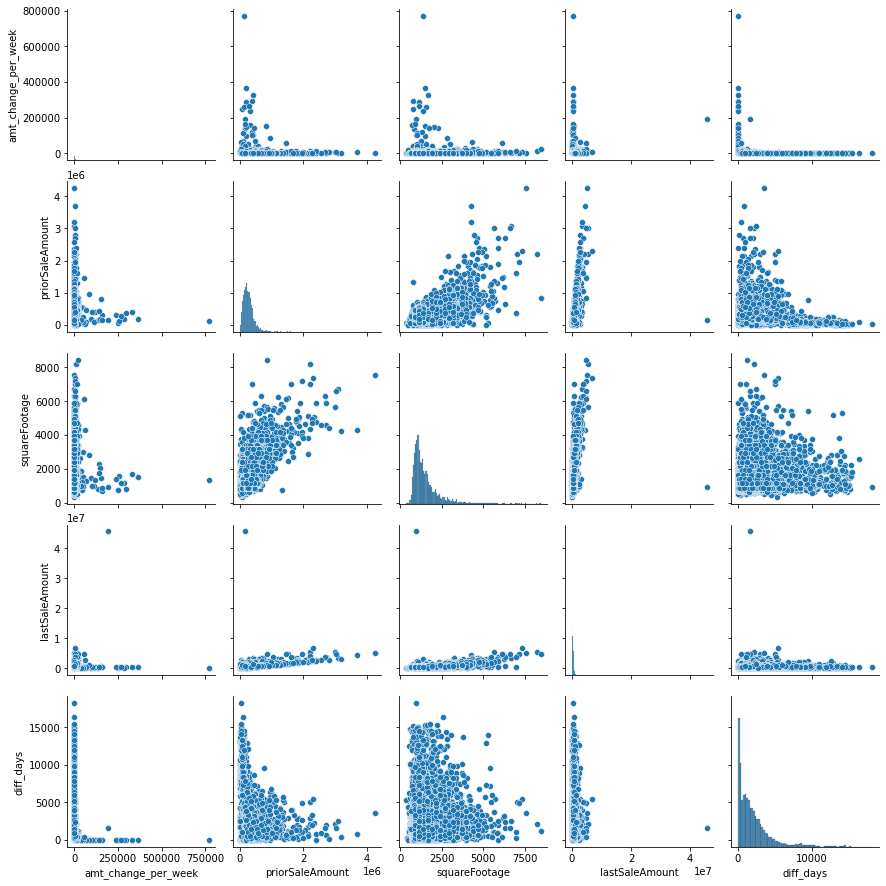

In [49]:
sns.pairplot(df_up[['amt_change_per_week','priorSaleAmount','squareFootage','lastSaleAmount','diff_days']])

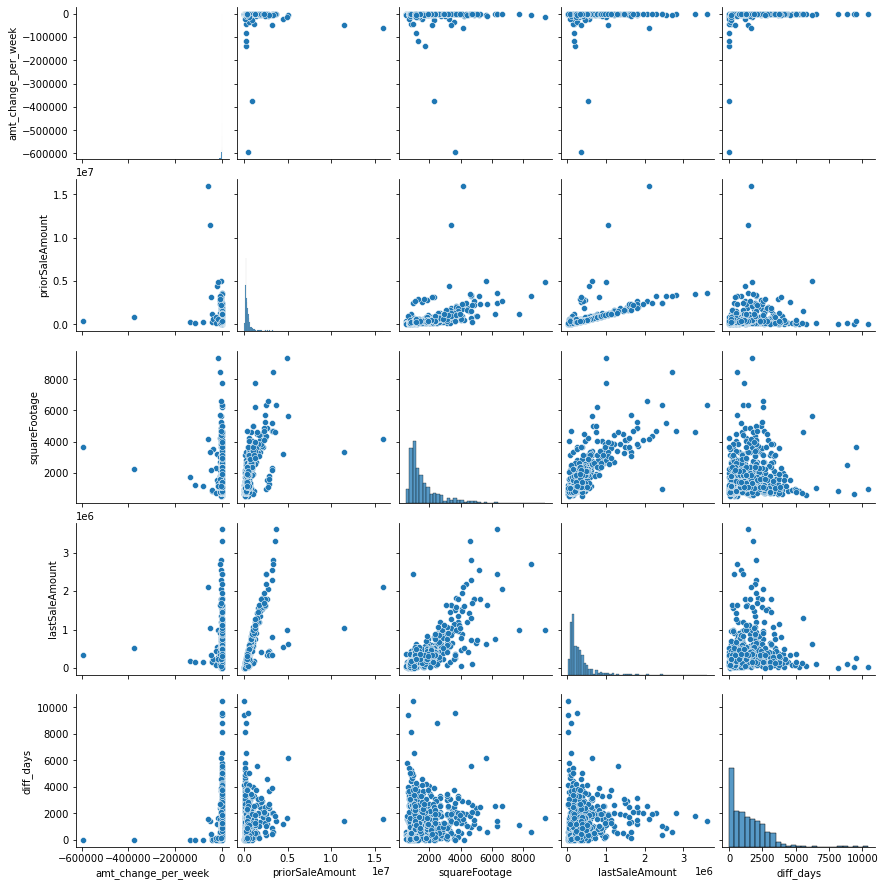

In [50]:
sns.pairplot(df_down[['amt_change_per_week','priorSaleAmount','squareFootage','lastSaleAmount','diff_days']])

In [51]:
df_q2.groupby('zipcode').amt_change_per_week.median().reset_index()

,zipcode,amt_change_per_week
0,80022,-310.616438
1,80123,199.022660
2,80202,279.176471
3,80203,330.388926
4,80204,362.852665
5,80205,507.706256
6,80206,448.834115
7,80207,490.734266
8,80209,460.526316
